# Figures for the Tracking experiment results

First of all, let's reveiew what data do we have. we have:
- Projector image brightness
- trial number
- time


Here is a list of figures needed for demonstrating (and interpreting) the tracking experiment results:

#### For single session
- trial time vs. brightness
- trial time vs. brightness shifted
- distribution of brightness intensity for the whole session
- Trial vs. latency
- Latency distribution

#### Comparing multiple sessions
- Latency distribution of Display for different parameters (resolution, or FR)
- Average brightness trace for different parameters



In [1]:
import glob
import os

import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import vrlatency as vrl

In [2]:
data_path = "../../data/"
figure_path = "../figures/"

In [3]:
os.chdir(data_path)

In [23]:
filenames = []
for filename in glob.glob("*.csv"):
    if filename.split('_')[0] == 'display':
        print(filename)
        filenames.append(filename)

display_20181017_195242.csv
display_20181017_201205.csv
display_20181017_204006.csv
display_20181017_210444.csv
display_20181017_212313.csv
display_20181017_214315.csv
display_20181017_215854.csv
display_20181018_000721.csv
display_20181018_124459.csv
display_20181018_125350.csv


In [56]:
session_number = 9
filename = filenames[session_number]
session_name = filename.split('.')[0]
df = vrl.read_csv(filename)

In [57]:
df.tail()

,Trial,Time,SensorBrightness
2599995,2001,49860,163
2599996,2001,49896,161
2599997,2001,49936,161
2599998,2001,49972,160
2599999,2001,50012,161


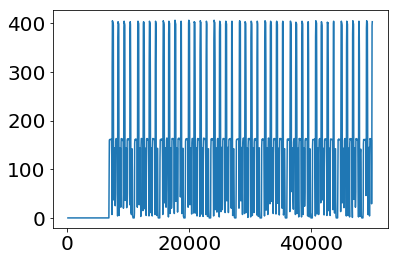

In [58]:
trial_num = 4
plt.plot(df.loc[df.Trial == trial_num, 'Time'], df.loc[df.Trial == trial_num, 'SensorBrightness'])

In [59]:
dfd = df.copy()
thresh = .75
df_transformed = vrl.analysis.transform_display_df(dfd, session=session_name, winsize=30, thresh=thresh)

In [62]:
len(df_transformed[df_transformed.Cluster == 0].Trial.unique()), len(df_transformed[df_transformed.Cluster == 1].Trial.unique())

(14, 1986)

In [69]:
df_clustered = df_transformed[df_transformed.Cluster == 1].copy()

In [70]:
df_shifted = vrl.analysis.shift_by_sse(df_clustered)

In [71]:
df_shifted.head()

,Session,Trial,Sample,Time,TrialTime,SensorBrightness,DisplayLatency,TrialTransitionTime,ThreshPerc,Cluster
0,display_20181018_125350,2,0,0.132,0.000,0,7.84,-8.272,0.75,1.0
1,display_20181018_125350,2,1,0.168,0.036,0,7.84,-8.236,0.75,1.0
2,display_20181018_125350,2,2,0.208,0.076,0,7.84,-8.196,0.75,1.0
3,display_20181018_125350,2,3,0.244,0.112,0,7.84,-8.160,0.75,1.0
4,display_20181018_125350,2,4,0.284,0.152,0,7.84,-8.120,0.75,1.0


---

In [72]:
dd = df_shifted.copy()

In [73]:
plt.rcParams.update({'font.size': 20})

In [74]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

# mean_latency = dd.groupby('Trial').DisplayLatency.mean().mean()
# vrl.analysis.plot_display_brightness_over_session(trial_time=dd['TrialTime'], sensor_brightness=dd['SensorBrightness'],
#                                                   nsamples_per_trial=dd.groupby('Trial')['DisplayLatency'].agg(len).min(),
#                                                   ax=ax1)
# vrl.analysis.plot_shifted_brightness_over_session(time=dd['TrialTransitionTime'], 
#                                                   sensor_brightness=dd['SensorBrightness'],
#                                                   trial_idx = dd['Trial'], shift_by=mean_latency, 
#                                                   ax=ax1)
# vrl.analysis.plot_brightness_threshold(sensor_brightness=dd['SensorBrightness'], thresh=dd['ThreshPerc'].values[0], ax=ax1)

# vrl.analysis.plot_display_brightness_distribution(sensor_brightness=dd['SensorBrightness'].values, ax=ax2)
# ax1.set_ylim(*ax2.get_ylim())
# ax2.set(xticklabels='', yticklabels='')
# ax2.set_xticks([])
# ax1.set(xlabel='Time (ms)', ylabel='Brightness');

# sns.despine(top=True, ax=ax1)
# sns.despine(top=True, bottom=True, ax=ax2)

# fig.tight_layout(w_pad=0)

# # plt.savefig(figure_path + 'display_a' + '_session' + str(session_number) + '.png', transparent=False)

## Average of the shifted brightness signals on top of the raw data

In [75]:
# avg_SensorBrightness = df_shifted.groupby('Sample').SensorBrightness.apply(np.mean)
# avg_TrialTime = df_shifted.groupby('Sample').TrialTime.apply(np.mean)

In [76]:
# fig, (ax3, ax4) = plt.subplots(2, 1)

# tt, bb = vrl.analysis.get_average_time_and_brightness(df_shifted)
# ax3.plot(tt, bb)

# ddd = df_shifted.loc[df_shifted['Trial'] == 3]
# ax4.plot(ddd.TrialTransitionTime + mean_latency, ddd.SensorBrightness)

Decide on using one trial or the average (if average, comment out the below code)

In [77]:
# tt, bb = ddd.TrialTransitionTime.values, ddd.SensorBrightness.values

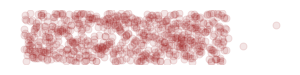

In [78]:
fig, ax  = plt.subplots(figsize=(5, 1))
y = np.random.random(dd.DisplayLatency.unique().shape) * 50 + dd.SensorBrightness.max() + 30

color = np.array([146, 0, 0]) / 255.
ax.scatter(dd.DisplayLatency.unique(), y, c=tuple(color), s=50, alpha=.1)
sns.despine(left=True, bottom=True, ax=ax)
ax.set(xlabel='', ylabel='');
plt.yticks([]); plt.xticks([]);

In [79]:
Trial = dd.groupby('Trial').DisplayLatency.min()
trial_num, display_latency = Trial.index.values, Trial.values

In [80]:
dd.Trial.max()

2001

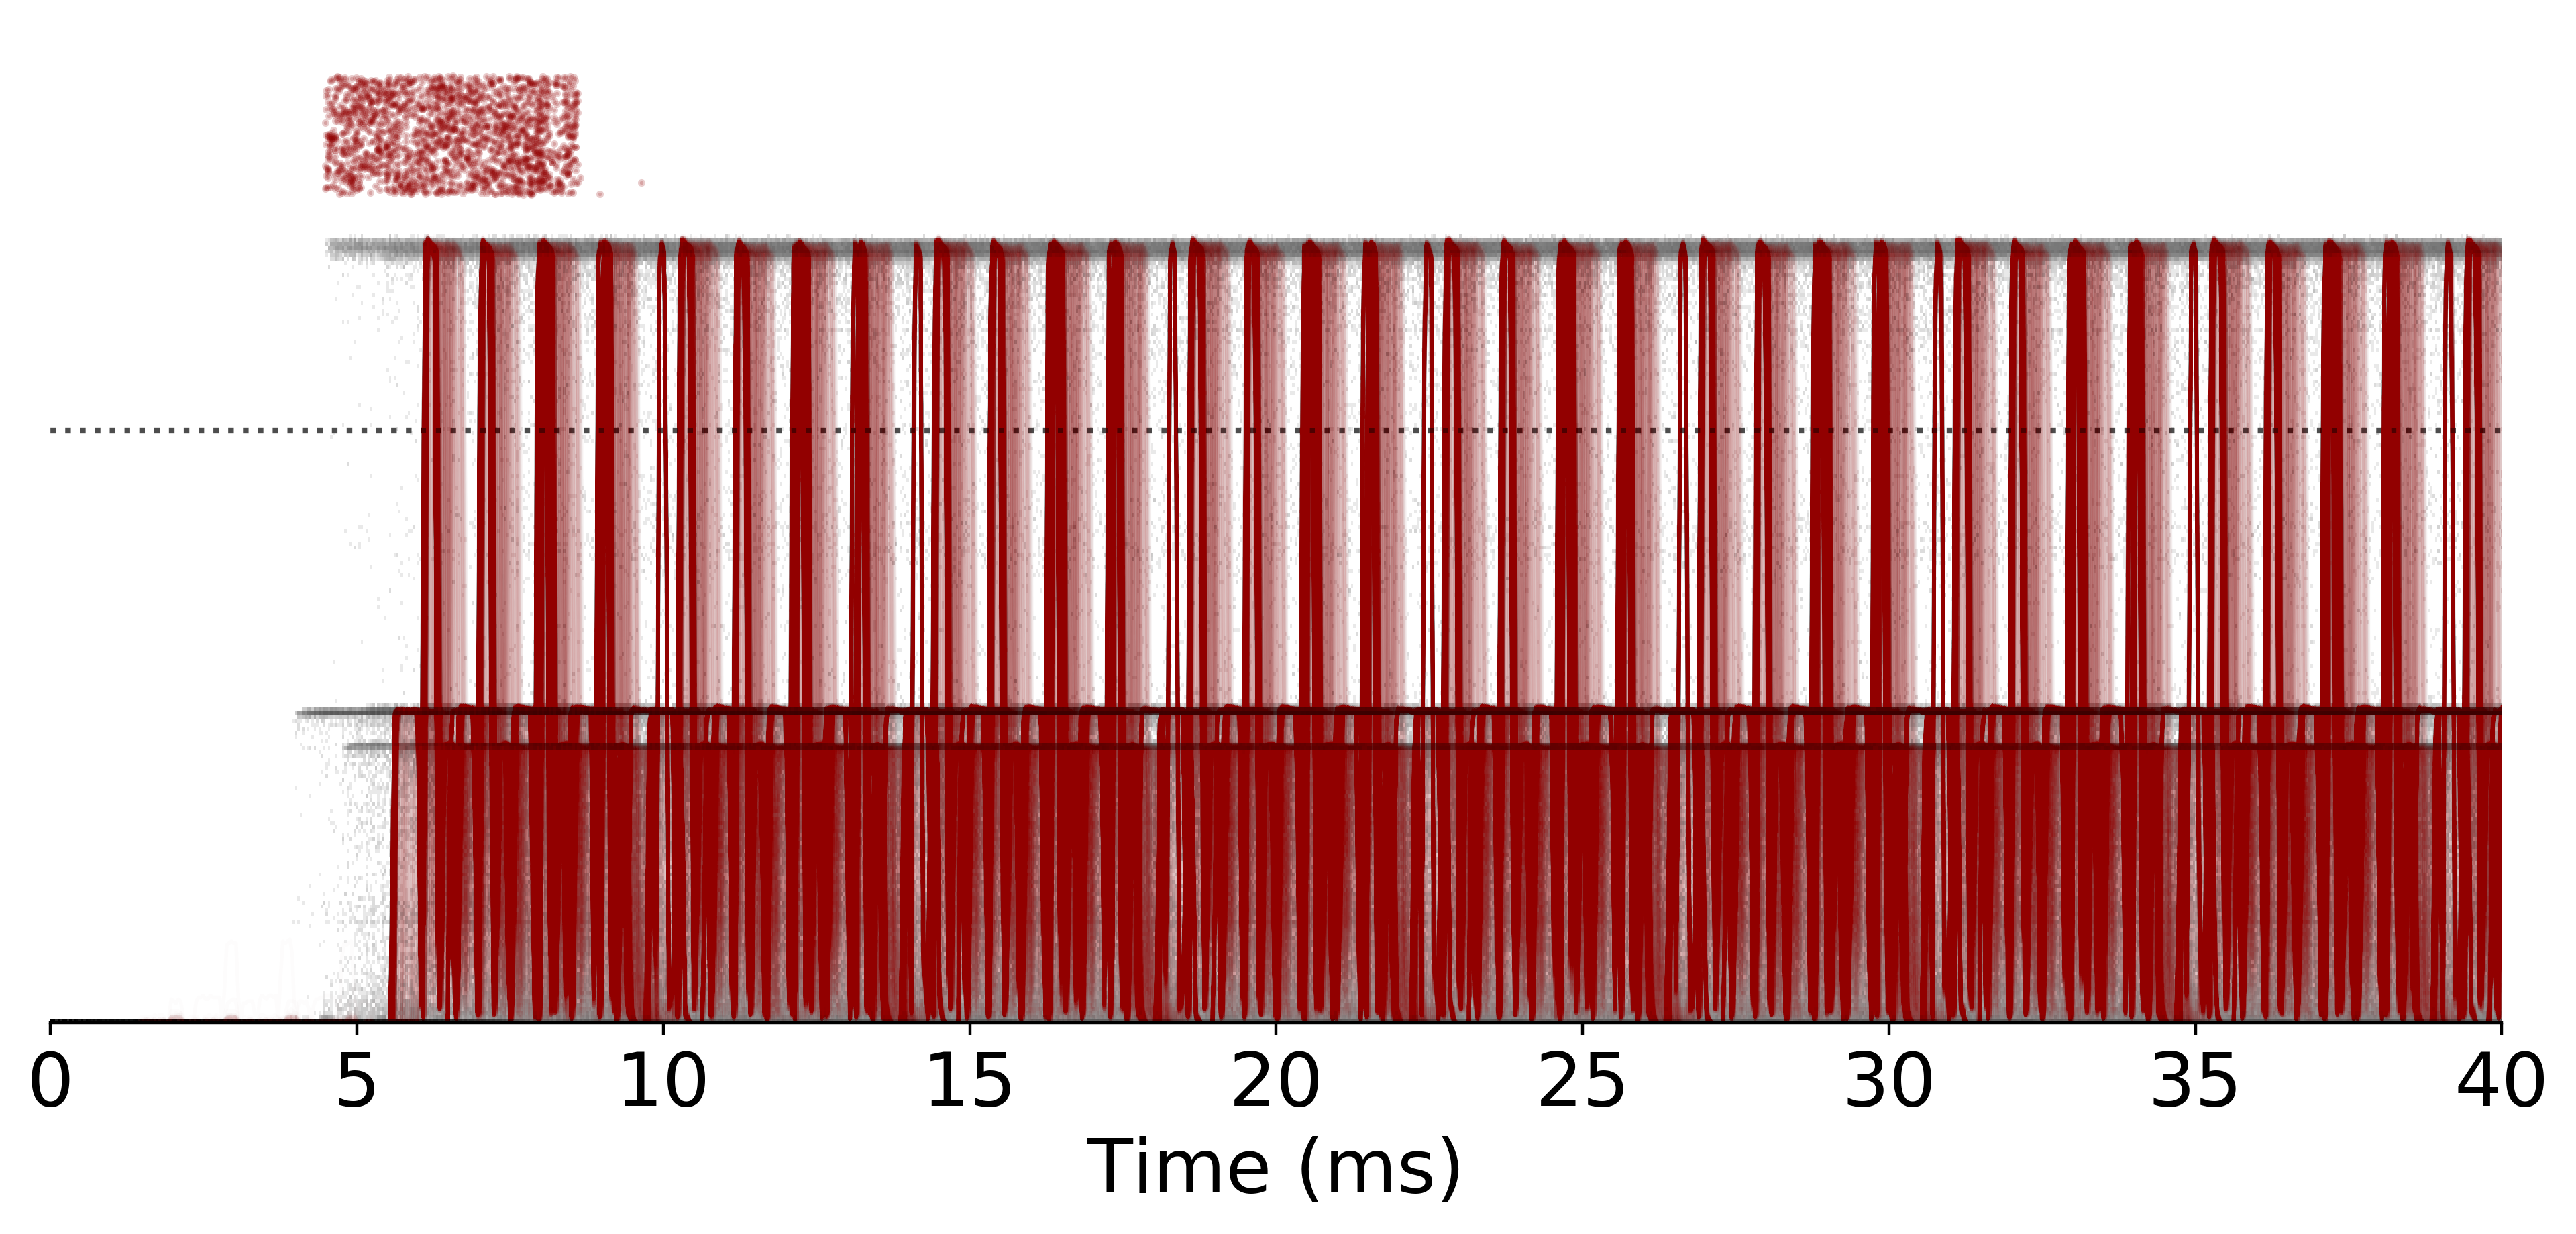

In [81]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=400)

mean_latency = dd.groupby('Trial').DisplayLatency.mean().mean()
vrl.analysis.plot_display_brightness_over_session(trial_time=dd['TrialTime'], sensor_brightness=dd['SensorBrightness'],
                                                  nsamples_per_trial=dd.groupby('Trial')['DisplayLatency'].agg(len).min(),
                                                  ax=ax)
vrl.analysis.plot_shifted_brightness_over_session(time=dd['TrialTransitionTime'], 
                                                  sensor_brightness=dd['SensorBrightness'],
                                                  trial_idx = dd['Trial'], shift_by=mean_latency, 
                                                  ax=ax, c=tuple(color))
trial_ax = (trial_num/(dd.Trial.max() - 1) * .15 + 1.05) * dd.SensorBrightness.max()
ax.scatter(display_latency, trial_ax, c=tuple(color), s=1, alpha=.2)
threshold_brightness = vrl.perc_range(dd.SensorBrightness, perc=thresh)
ax.hlines(threshold_brightness, *ax.get_xlim(), color='.3', linestyle='dotted')


ax.set(xlabel='Time (ms)', ylabel='', xlim=(0, 40));
plt.yticks([]);
sns.despine(left=True, ax=ax)
fig.tight_layout()

plt.savefig(figure_path + 'display_avg_with_ci' + '_session' + str(session_number) + '.png', transparent=False)

## 95% interval with two complementary brightness traces

In [43]:
# latency_025, latency_975 = np.percentile(dd.DisplayLatency.values, [2.5, 97.5])
# latency_025, latency_975

In [44]:
# brightness_threshold = vrl.perc_range(dd.SensorBrightness, perc=.7)
# upper_limit = np.where(bb >= brightness_threshold)[0][0] + 1

# brightness_threshold = vrl.perc_range(dd.SensorBrightness, perc=.2)
# lower_limit = np.where(bb <= brightness_threshold)[0][-1]

# upper_limit, lower_limit

lower and upper limits in time:

In [220]:
# lower_limit = -1
# upper_limit = .1

# lower_limit = np.where(tt > lower_limit)[0][0]
# upper_limit = np.where(tt <= upper_limit)[0][-1]

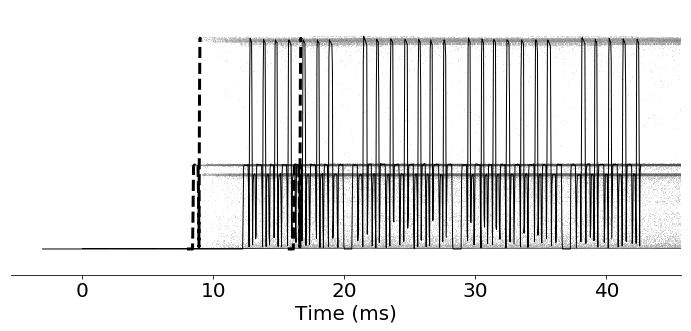

In [221]:
# fig, ax = plt.subplots(figsize=(10, 5))

# mean_latency = dd.groupby('Trial').DisplayLatency.mean().mean()
# vrl.analysis.plot_display_brightness_over_session(trial_time=dd['TrialTime'], sensor_brightness=dd['SensorBrightness'],
#                                                   nsamples_per_trial=dd.groupby('Trial')['DisplayLatency'].agg(len).min(),
#                                                   ax=ax)

# ax.plot(tt + mean_latency, bb, 'k', linewidth=1)
# ax.plot(tt[lower_limit: upper_limit] + latency_025, bb[lower_limit: upper_limit], 'k--', linewidth=3)
# ax.plot(tt[lower_limit: upper_limit] + latency_975, bb[lower_limit: upper_limit], 'k--', linewidth=3)
# # vrl.analysis.plot_brightness_threshold(sensor_brightness=dd['SensorBrightness'], thresh=dd['ThreshPerc'].values[0], ax=ax)

# ax.set_ylim(*ax1.get_ylim())
# # ax.set_xlim(*ax1.get_xlim())
# ax.set(xlabel='Time (ms)', ylabel='');

# sns.despine(left=True, ax=ax)
# plt.yticks([]);
# fig.tight_layout()

# plt.savefig(figure_path + 'display_avg_with_ci' + '_session' + str(session_number) + '.png', transparent=False)

## A different representation of latency distribution using jittered scatter plot

First let's just make a jittered (offset in y axis) version of the latencies

## Trials versus latency (with distribution)

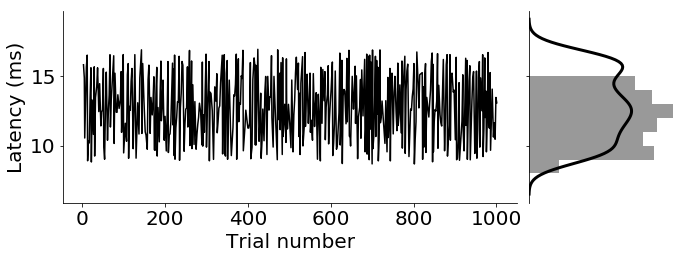

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)
vrl.analysis.plot_tracking_latency_over_session(dd.Trial, dd.DisplayLatency, ax=ax1)
ax1.set(xlabel='Trial number', ylabel='Latency (ms)')
sns.despine(top=True, ax=ax1)

vrl.analysis.plot_tracking_latency_distribution(dd['DisplayLatency'].unique(), ax=ax2)
sns.despine(top=True, bottom=True, ax=ax2)
ax2.set(xticklabels='')
ax2.set_xticks([])
fig.tight_layout(w_pad=0)

# plt.savefig(figure_path + 'display_b' + '_session' + str(session_number) + '.png', transparent=False)

## Latency distribution alone

Enables comparison between different display latency measurements

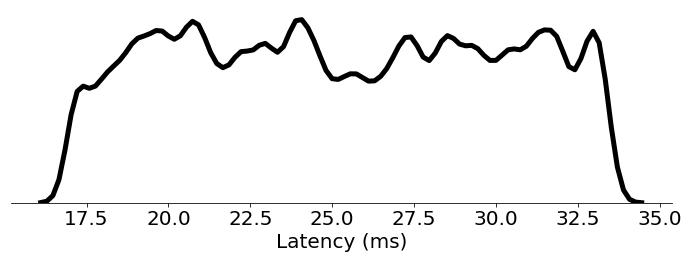

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.despine(left=True)

sns.distplot(dd.DisplayLatency.values, hist=False, color="k", kde_kws={"linewidth": 5, "alpha": 1}, ax=ax);
# ax.set(xlabel='Latency (ms)', ylabel='Frequency (normalized)');
ax.set(xlabel='Latency (ms)', ylabel='');
plt.yticks([]);
fig.tight_layout()

# plt.savefig(figure_path + 'display_c' + '_session' + str(session_number) + '.png', transparent=False)

---

# Comparing multiple screens

For this purpose we do not need to use the transformed dataframe, we can use the original dataframes.

So here is what I am gonna do:
- read the data for all the experiment, get the latency dataframe and put the in a single dataframe
- read the parameteres for all the experiment and put them in a single dataframe
- And then merge the data dataframe and the parameters dataframes
- Then we can compare stuff among different parameters

### Read several data and save the latency dataframes

In [147]:
df_all = pd.DataFrame()

for filename in filenames:
    print(filename)
    
    dfd = vrl.read_csv(filename)
    dfd['Time'] /= 1000
    dfd['Session'] = filename.split('.')[0]
    
    dfp = pd.Series(vrl.read_params(filename)).to_frame().T
    dfp = pd.DataFrame(dfp[['Width', 'Height', 'Depth', 'Rate']], dtype=int)
    dfp['Session'] = filename.split('.')[0]
    dfp = dfp[['Session', 'Width', 'Height', 'Depth', 'Rate']]
    dfp['Resolution'] = dfp['Width'] * dfp['Height']
    
    df = pd.merge(dfd, dfp, on='Session')
    df = df.reindex(['Session', 'Trial', 'Time', 'SensorBrightness', 'Width', 'Height', 'Resolution', 'Depth', 'Rate'], axis=1)
    
    dfl = vrl.get_display_latencies(df, thresh=thresh).to_frame().reset_index()
    df = pd.merge(df, dfl, on='Trial')
    
    df_all = df_all.append(df)

display_20181010_122654.csv
display_20181010_124342.csv
display_20181010_130049.csv
display_20181010_132213.csv
display_20181010_133340.csv


In [148]:
df_all = df_all[['Session', 'Trial', 'Width', 'Height', 'Resolution', 'Depth', 'Rate', 'DisplayLatency']]
df_all.drop_duplicates(inplace=True)

In [149]:
df_all.head()

,Session,Trial,Width,Height,Resolution,Depth,Rate,DisplayLatency
0,display_20181010_122654,2,1280,720,921600,32,60,26.908
1200,display_20181010_122654,3,1280,720,921600,32,60,19.752
2400,display_20181010_122654,4,1280,720,921600,32,60,27.972
3600,display_20181010_122654,5,1280,720,921600,32,60,18.352
4800,display_20181010_122654,6,1280,720,921600,32,60,28.856


## Latency distribution for multiple screens

60
120
240


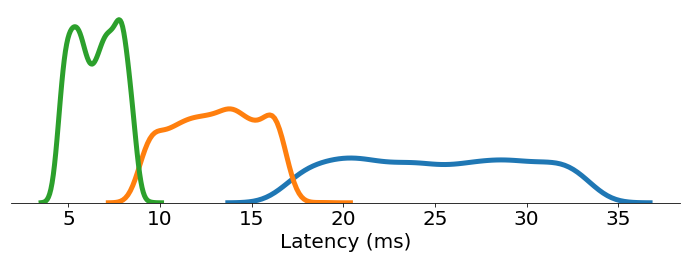

In [150]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.despine(left=True)

for name, dd in df_all.groupby('Rate'):
    print(name)
    sns.distplot(dd.DisplayLatency.values, hist=False, kde_kws={"linewidth": 5, "alpha": 1}, ax=ax)
    
ax.set(xlabel='Latency (ms)', ylabel='');
plt.yticks([]);
fig.tight_layout()

# plt.savefig(figure_path + 'display_c' + '_session' + str(session_number) + '.png', transparent=False)

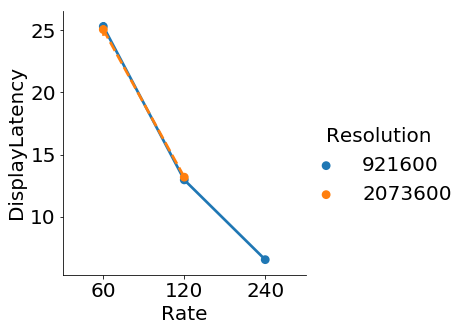

In [151]:
g = sns.catplot(x="Rate", y="DisplayLatency", hue="Resolution",
                kind="point", linestyles=["-", "--"], data=df_all)

---

Combining multiple images for figure creation

In [57]:
from PIL import Image

In [58]:
def combine_images(images, axis=1):
    
    images = list(map(Image.open, images))
    widths, heights = zip(*(i.size for i in images))
    total_width = max(widths) if axis else sum(widths)
    max_height = sum(heights) if axis else max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset, y_offset = 0, 0
    for im in images:
        new_im.paste(im, (x_offset, y_offset))
        x_offset = x_offset + im.size[axis] if not axis else 0
        y_offset = y_offset + im.size[axis] if axis else 0
        
    return new_im

In [59]:
images =  [figure_path + "display_avg_with_ci_session0.png", 
           figure_path + "display_avg_with_ci_session1.png", 
           figure_path + "display_avg_with_ci_session2.png"]

new_im = combine_images(images)
new_im.save(figure_path + "combined.png")